In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
from google.colab import files
uploaded = files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset.csv


✅ R² Score: -0.0199
📉 RMSE: 171.88


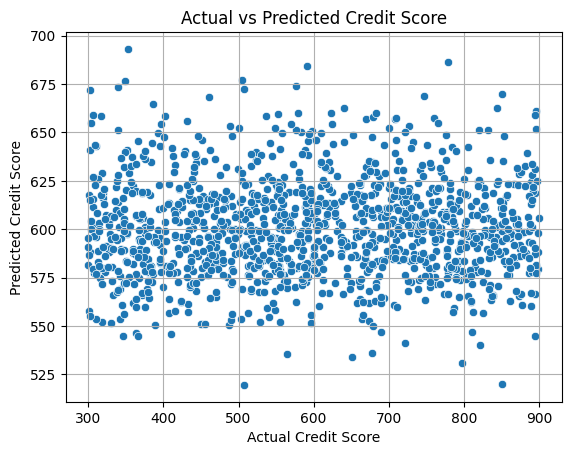

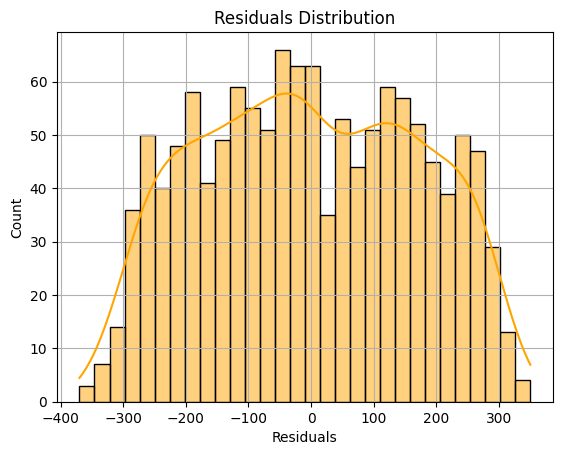

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load and clean
df = pd.read_csv("loan_approval_dataset.csv")
df.columns = df.columns.str.strip()  # Remove spaces from column names
df.dropna(inplace=True)

# Rename for clarity
df.rename(columns={
    'income_annum': 'income_annum',
    'loan_amount': 'loan_amount',
    'cibil_score': 'credit_score',
    'self_employed': 'self_employed',
    'no_of_dependents': 'dependents',
}, inplace=True)

# Feature engineering
df["monthly_income"] = df["income_annum"] / 12
df["loan_to_income_ratio"] = df["loan_amount"] / (df["monthly_income"] + 1)
df["income_stability_score"] = (df["self_employed"].str.lower() == "yes").astype(int)
df["dependent_count"] = df["dependents"].replace("3+", 3).astype(float)

# Simulated behavioral features
np.random.seed(42)
n = len(df)
df["monthly_digital_txn_count"] = np.random.poisson(15, n).clip(0, 40)
df["monthly_digital_txn_amount"] = np.random.normal(2000, 1000, n).clip(100, 8000)
df["wallet_balance_avg"] = np.random.normal(800, 500, n).clip(0, 2000)
df["avg_recharge_amount"] = np.random.normal(300, 100, n).clip(100, 500)
df["electricity_bill_timeliness"] = np.random.choice([0, 1], n, p=[0.2, 0.8])
df["rent_paid"] = np.random.choice([0, 1], n, p=[0.5, 0.5])
df["SHG_membership"] = np.random.choice([0, 1], n, p=[0.4, 0.6])

# Encode education
df = pd.get_dummies(df, columns=["education"], drop_first=True)

# Feature list
features = [
    "monthly_income", "loan_amount", "loan_to_income_ratio", "income_stability_score",
    "dependent_count", "monthly_digital_txn_count", "monthly_digital_txn_amount",
    "wallet_balance_avg", "avg_recharge_amount", "electricity_bill_timeliness",
    "rent_paid", "SHG_membership"
] + [col for col in df.columns if col.startswith("education_")]

X = df[features]
y = df["credit_score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=150, max_depth=12, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ R² Score: {r2:.4f}")
print(f"📉 RMSE: {rmse:.2f}")

# Visualize
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Credit Score")
plt.ylabel("Predicted Credit Score")
plt.title("Actual vs Predicted Credit Score")
plt.grid(True)
plt.show()

# Residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=30, color="orange")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()


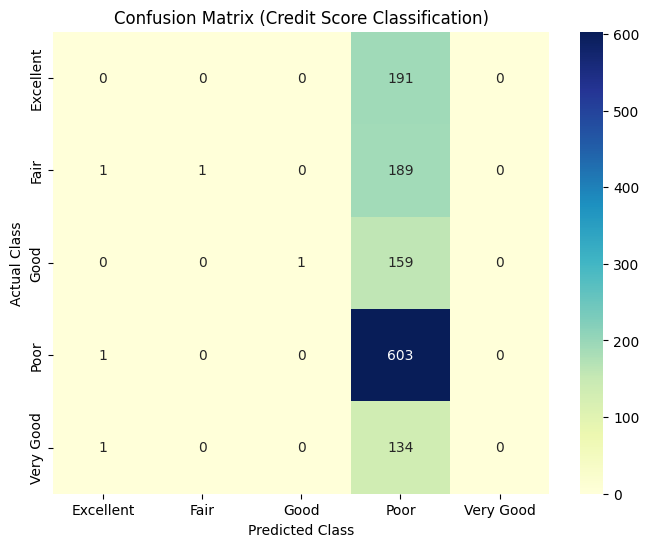

📋 Classification Report (Precision, Recall, F1-Score):

              precision    recall  f1-score   support

   Excellent       0.00      0.00      0.00       191
        Fair       1.00      0.01      0.01       191
        Good       1.00      0.01      0.01       160
        Poor       0.47      1.00      0.64       604
   Very Good       0.00      0.00      0.00       135

    accuracy                           0.47      1281
   macro avg       0.49      0.20      0.13      1281
weighted avg       0.50      0.47      0.31      1281


📊 Credit Score Class Definitions:
| Credit Score Range | Class Name   |
|--------------------|--------------|
| 300–579            | Poor         |
| 580–669            | Fair         |
| 670–739            | Good         |
| 740–799            | Very Good    |
| 800–850            | Excellent    |


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ✅ Convert credit score to risk class
def map_score_to_class(score):
    if score < 580:
        return "Poor"
    elif score < 670:
        return "Fair"
    elif score < 740:
        return "Good"
    elif score < 800:
        return "Very Good"
    else:
        return "Excellent"

df["credit_class"] = df["credit_score"].apply(map_score_to_class)

# ✅ Prepare data
X_class = df[features]
y_class = df["credit_class"]

# Encode class labels
le = LabelEncoder()
y_encoded = le.fit_transform(y_class)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_class, y_encoded, test_size=0.3, random_state=42)

# ✅ Train classifier
clf = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
labels = le.classes_

# 🔥 Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix (Credit Score Classification)")
plt.show()

# ✅ Classification Report
report = classification_report(y_test, y_pred_class, target_names=labels)
print("📋 Classification Report (Precision, Recall, F1-Score):\n")
print(report)

# ✅ Print the credit score class ranges for users
print("\n📊 Credit Score Class Definitions:")
print("| Credit Score Range | Class Name   |")
print("|--------------------|--------------|")
print("| 300–579            | Poor         |")
print("| 580–669            | Fair         |")
print("| 670–739            | Good         |")
print("| 740–799            | Very Good    |")
print("| 800–850            | Excellent    |")
